In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('/content/water_potability.csv')

In [ ]:
data

ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]

In [4]:
data.head()

ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0       NaN  204.890455  20791.318981  ...        86.990970   2.963135           0
1  3.716080  129.422921  18630.057858  ...        56.329076   4.500656           0
2  8.099124  224.236259  19909.541732  ...        66.420093   3.055934           0
3  8.316766  214.373394  22018.417441  ...       100.341674   4.628771           0
4  9.092223  181.101509  17978.986339  ...        31.997993   4.075075           0

[5 rows x 10 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
data.describe()

ph     Hardness  ...    Turbidity   Potability
count  2785.000000  3276.000000  ...  3276.000000  3276.000000
mean      7.080795   196.369496  ...     3.966786     0.390110
std       1.594320    32.879761  ...     0.780382     0.487849
min       0.000000    47.432000  ...     1.450000     0.000000
25%       6.093092   176.850538  ...     3.439711     0.000000
50%       7.036752   196.967627  ...     3.955028     0.000000
75%       8.062066   216.667456  ...     4.500320     1.000000
max      14.000000   323.124000  ...     6.739000     1.000000

[8 rows x 10 columns]

In [7]:
data_num = data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

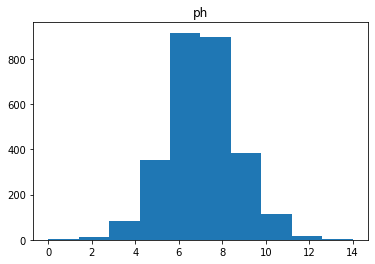

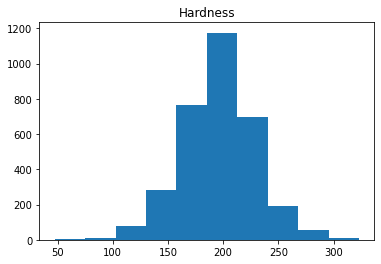

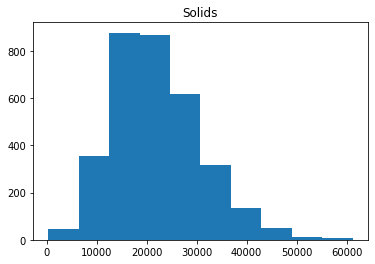

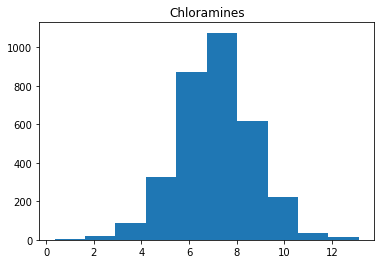

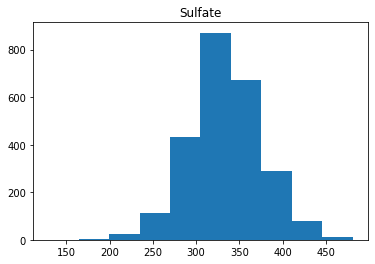

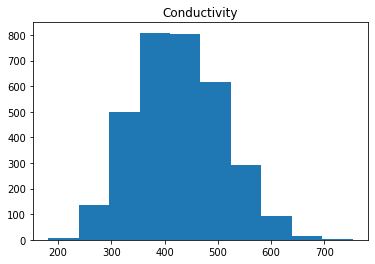

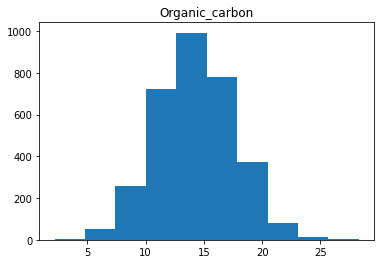

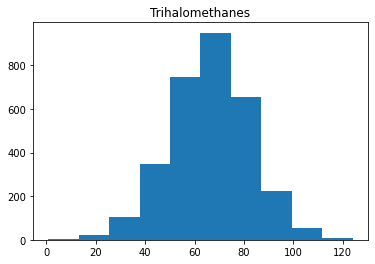

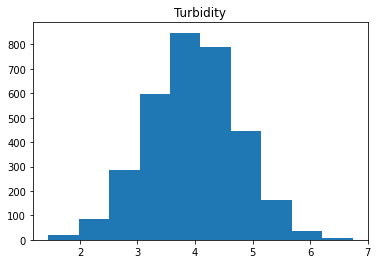

In [8]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

                       ph  Hardness  ...  Trihalomethanes  Turbidity
ph               1.000000  0.082096  ...         0.003354  -0.039057
Hardness         0.082096  1.000000  ...        -0.013013  -0.014449
Solids          -0.089288 -0.046899  ...        -0.009143   0.019546
Chloramines     -0.034350 -0.030054  ...         0.017084   0.002363
Sulfate          0.018203 -0.106923  ...        -0.030274  -0.011187
Conductivity     0.018614 -0.023915  ...         0.001285   0.005798
Organic_carbon   0.043503  0.003610  ...        -0.013274  -0.027308
Trihalomethanes  0.003354 -0.013013  ...         1.000000  -0.022145
Turbidity       -0.039057 -0.014449  ...        -0.022145   1.000000

[9 rows x 9 columns]


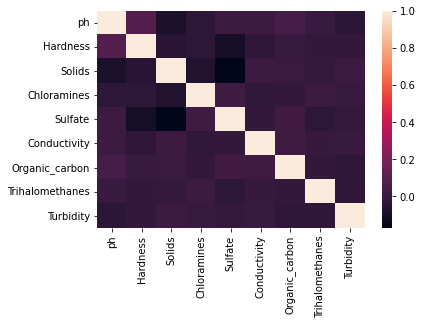

In [9]:
print(data_num.corr())
sns.heatmap(data_num.corr())

In [10]:
pd.pivot_table(data, index='Potability', values=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])


Chloramines  Conductivity  ...  Turbidity        ph
Potability                             ...                     
0              7.092175    426.730454  ...   3.965800  7.085378
1              7.169338    425.383800  ...   3.968328  7.073783

[2 rows x 9 columns]

In [11]:
for i in data_num.columns:
    if data_num[i].isna().sum() >0 :   
        data[i].fillna(data[i].mean(), inplace=True)             
      


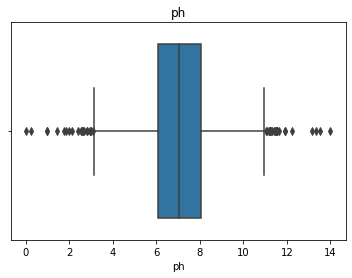

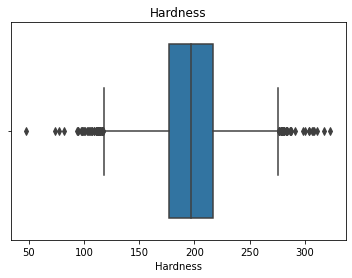

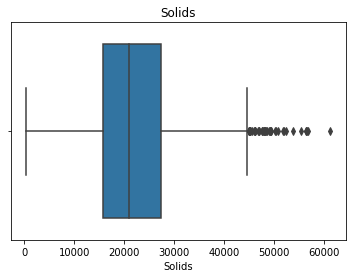

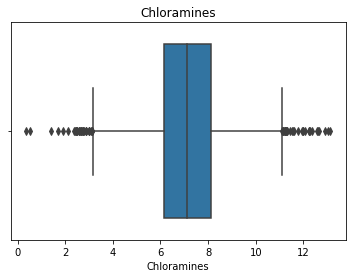

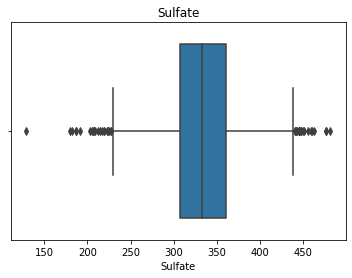

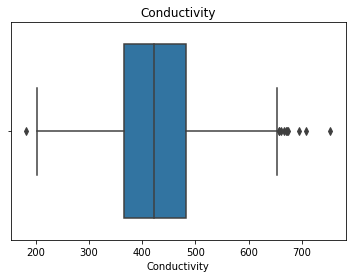

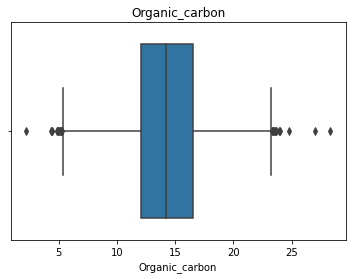

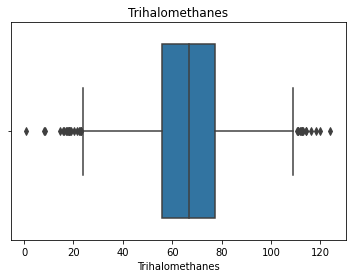

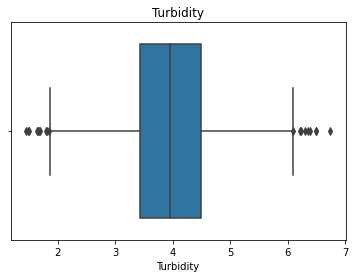

In [12]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [13]:
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [14]:
Lowph,Upph = outlinefree(data.ph)
LowHardness,UpHardness = outlinefree(data.Hardness)
LowSolids,UpSolids = outlinefree(data.Solids)
LowChloramines,UpChloramines = outlinefree(data.Chloramines)
LowSulfate,UpSulfate  = outlinefree(data.Sulfate)
LowConductivity ,UpConductivity  = outlinefree(data.Conductivity)
LowOc,UpOc = outlinefree(data.Organic_carbon) 
LowTri ,UpTri = outlinefree(data.Trihalomethanes) 
LowTur,UpTur = outlinefree(data.Turbidity)

In [15]:
data.ph.replace(list(data[(data.ph < Lowph)].ph),Lowph , inplace=True)
data.ph.replace(list(data[(data.ph > Upph)].ph),Upph , inplace=True)

data.Hardness.replace(list(data[(data.Hardness < LowHardness)].Hardness),LowHardness , inplace=True)
data.Hardness.replace(list(data[(data.Hardness > UpHardness)].Hardness),UpHardness , inplace=True)

data.Solids.replace(list(data[(data.Solids < LowSolids)].Solids),LowSolids , inplace=True)
data.Solids.replace(list(data[(data.Solids > UpSolids)].Solids),UpSolids , inplace=True)

data.Chloramines.replace(list(data[(data.Chloramines < LowChloramines)].Chloramines),LowChloramines , inplace=True)
data.Chloramines.replace(list(data[(data.Chloramines > UpChloramines)].Chloramines),UpChloramines , inplace=True)

data.Sulfate.replace(list(data[(data.Sulfate < LowSulfate)].Sulfate),LowSulfate , inplace=True)
data.Sulfate.replace(list(data[(data.Sulfate > UpSulfate)].Sulfate),UpSulfate , inplace=True)

data.Conductivity.replace(list(data[(data.Conductivity < LowConductivity)].Conductivity),LowConductivity , inplace=True)
data.Conductivity.replace(list(data[(data.Conductivity > UpConductivity)].Conductivity),UpConductivity , inplace=True)

data.Organic_carbon.replace(list(data[(data.Organic_carbon < LowOc)].Organic_carbon),LowOc , inplace=True)
data.Organic_carbon.replace(list(data[(data.Organic_carbon > UpOc)].Organic_carbon),UpOc , inplace=True)

data.Trihalomethanes.replace(list(data[(data.Trihalomethanes < LowTri)].Trihalomethanes),LowTri , inplace=True)
data.Trihalomethanes.replace(list(data[(data.Trihalomethanes > UpTri)].Trihalomethanes),UpTri , inplace=True)

data.Turbidity.replace(list(data[(data.Turbidity < LowTur)].Turbidity),LowTur , inplace=True)
data.Turbidity.replace(list(data[(data.Turbidity > UpTur)].Turbidity),UpTur , inplace=True)

In [16]:
data_num = data[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

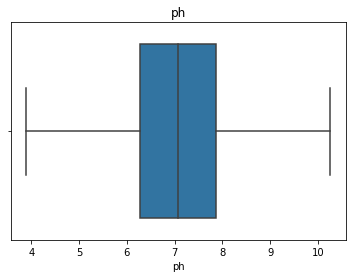

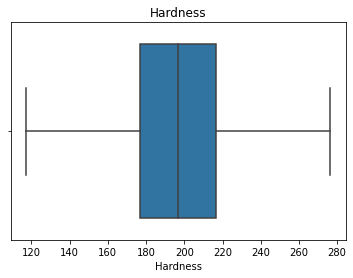

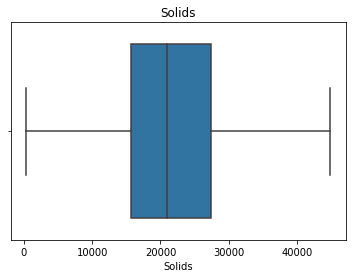

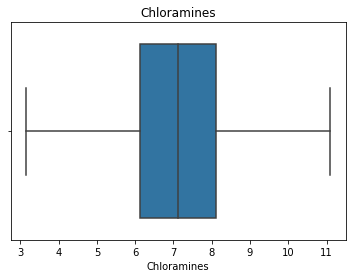

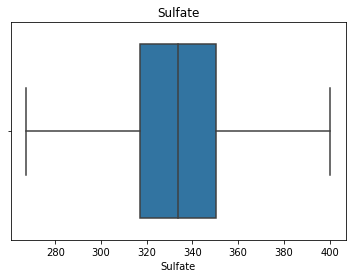

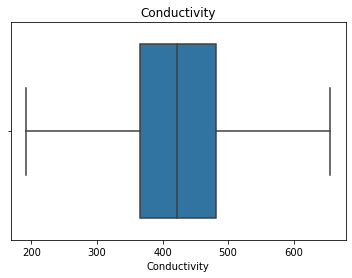

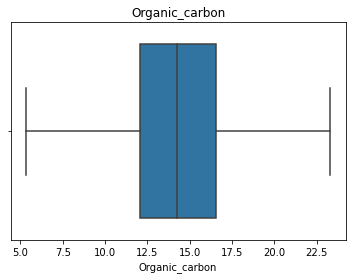

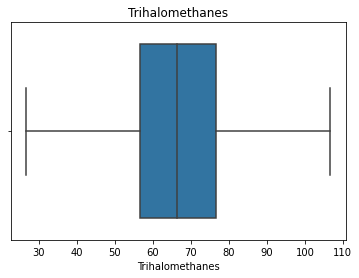

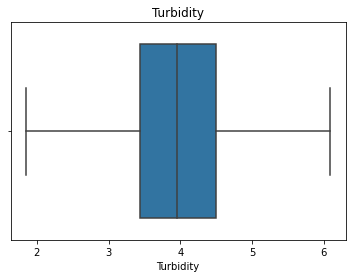

In [17]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.title(i)
    plt.show()

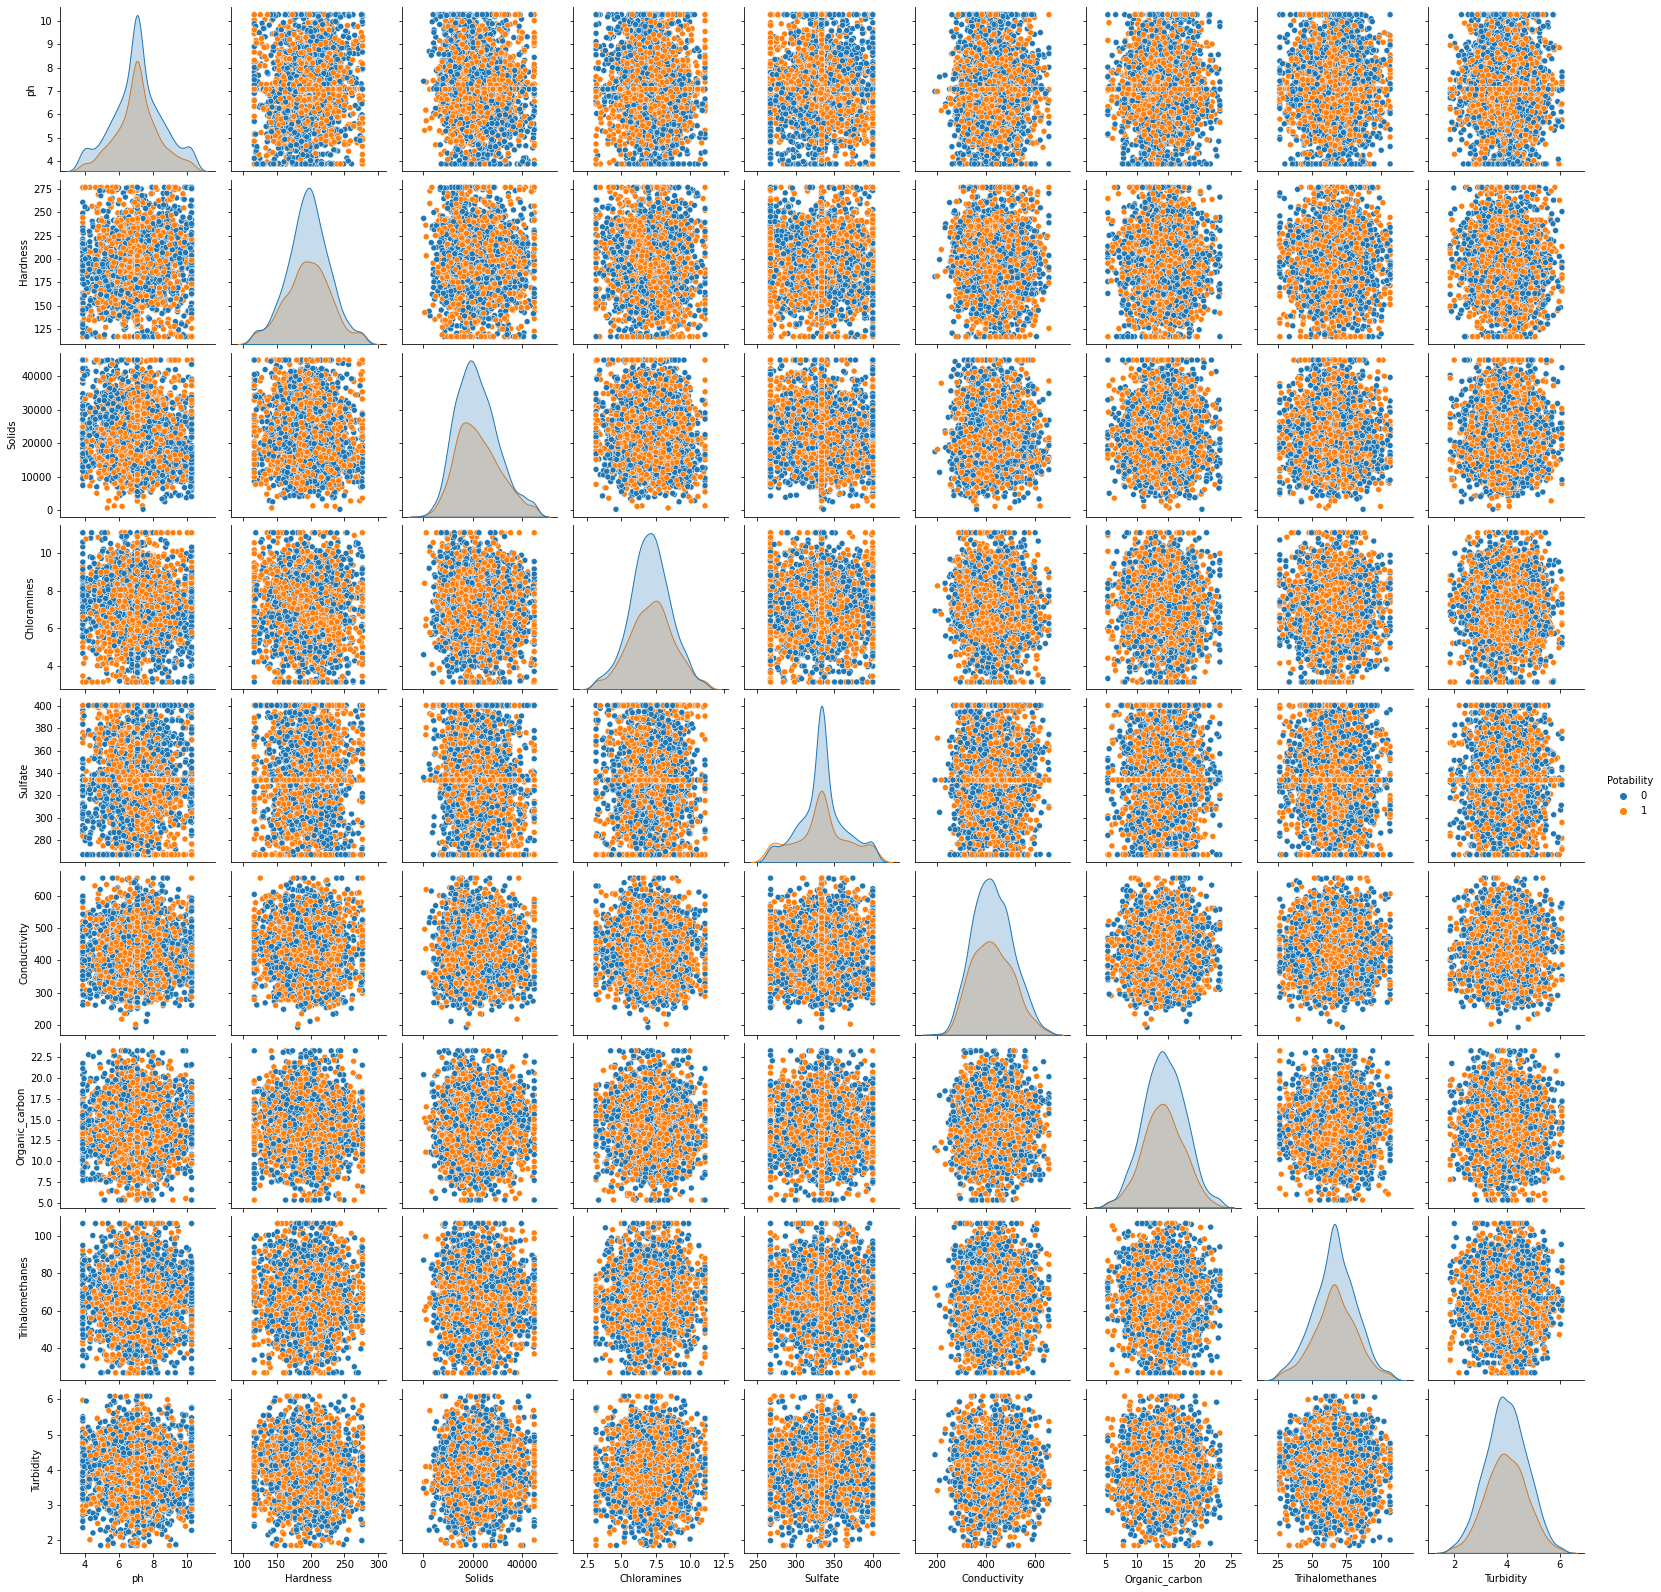

In [18]:
sns.pairplot(data, hue="Potability")

In [19]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [20]:
#------------------------LogisticRegression-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=296)
LRmodel= LogisticRegression()  
LRmodel.fit(X_train, y_train)
trainscore =  LRmodel.score(X_train,y_train)
testscore =  LRmodel.score(X_test,y_test)  
y_pred =  LRmodel.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

In [22]:
#------------------------------naive bayes---------------------------
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=179) 

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

y_predNB =  NBmodel.predict(X_test)
print(confusion_matrix(y_test, y_predNB))
print("f1_score: ",f1_score(y_test, y_predNB),'\n')
print("precision_score: ",precision_score(y_test, y_predNB),'\n')
print("recall_score: ",recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

[[466  56]
 [225  72]]
f1_score:  0.3388235294117647 

precision_score:  0.5625 

recall_score:  0.24242424242424243 

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       522
           1       0.56      0.24      0.34       297

    accuracy                           0.66       819
   macro avg       0.62      0.57      0.55       819
weighted avg       0.63      0.66      0.61       819



In [23]:
#-------------------------------- support vector classification -------------------------------------  
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=32) 

svcmodel = SVC(probability=True)  
svcmodel.fit(X_train, y_train) 

trainscore =  svcmodel.score(X_train,y_train)
testscore =  svcmodel.score(X_test,y_test)

y_predsvc =  svcmodel.predict(X_test)

print(confusion_matrix(y_test, y_predsvc))
print("f1_score: ",f1_score(y_test, y_predsvc),'\n')
print("precision_score: ",precision_score(y_test, y_predsvc),'\n')
print("recall_score: ",recall_score(y_test, y_predsvc),'\n')
print(classification_report(y_test, y_predsvc),'\n')

[[494   0]
 [325   0]]
f1_score:  0.0 

precision_score:  0.0 

recall_score:  0.0 

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       494
           1       0.00      0.00      0.00       325

    accuracy                           0.60       819
   macro avg       0.30      0.50      0.38       819
weighted avg       0.36      0.60      0.45       819
 



In [24]:
#------------------------------------------ DecisionTree---------------------

X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.25,random_state=298)
    
modelDtree = DecisionTreeClassifier(max_depth=3)
modelDtree.fit(X_train,y_train)
    
training = modelDtree.score(X_train,y_train)
testing = modelDtree.score(X_test,y_test)    
   
y_predtree =  modelDtree.predict(X_test)

print(confusion_matrix(y_test, y_predtree))
print("f1_score: ",f1_score(y_test, y_predtree),'\n')
print("precision_score: ",precision_score(y_test, y_predtree),'\n')
print("recall_score: ",recall_score(y_test, y_predtree),'\n')
print(classification_report(y_test, y_predtree),'\n')

[[419  82]
 [204 114]]
f1_score:  0.4435797665369649 

precision_score:  0.5816326530612245 

recall_score:  0.3584905660377358 

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       501
           1       0.58      0.36      0.44       318

    accuracy                           0.65       819
   macro avg       0.63      0.60      0.59       819
weighted avg       0.64      0.65      0.63       819
 



In [25]:
#------------------------------------------------RandomForest-------------------------------------
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.25,random_state=289)
    
modelRFC = RandomForestClassifier(criterion='entropy',max_depth=3)
modelRFC.fit(X_train,y_train)
    
training = modelRFC.score(X_train,y_train)
testing = modelRFC.score(X_test,y_test)   

y_predRFC =  modelRFC.predict(X_test)

print(confusion_matrix(y_test, y_predRFC))
print("f1_score: ",f1_score(y_test, y_predRFC),'\n')
print("precision_score: ",precision_score(y_test, y_predRFC),'\n')
print("recall_score: ",recall_score(y_test, y_predRFC),'\n')
print(classification_report(y_test, y_predRFC),'\n')

[[498   8]
 [287  26]]
f1_score:  0.14985590778097982 

precision_score:  0.7647058823529411 

recall_score:  0.08306709265175719 

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       506
           1       0.76      0.08      0.15       313

    accuracy                           0.64       819
   macro avg       0.70      0.53      0.46       819
weighted avg       0.68      0.64      0.53       819
 



0.5225397541516478


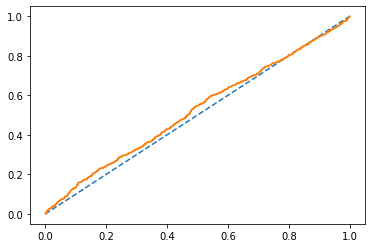

In [26]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = LRmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.601116374590553


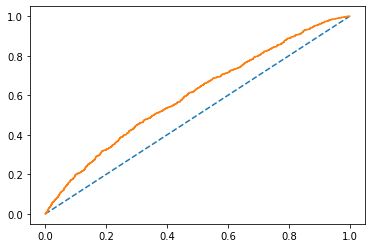

In [27]:
#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.5316263054917202


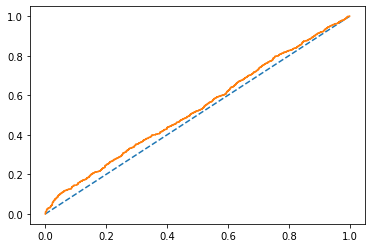

In [28]:
#--------------------------------------  support vector classification -------------------------------------
probabilityValues = svcmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.615752097950846


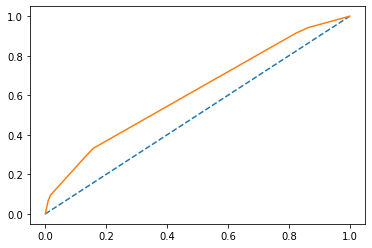

In [29]:
#-------------------------------------- DecisionTree -------------------------------------

probabilityValues = modelDtree.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.6886037054268667


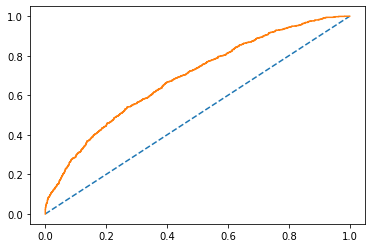

In [30]:
#-------------------------------------- RandomForest -------------------------------------
probabilityValues = modelRFC.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)